In [1]:
# %%
# Starter notebook to load and merge COVID-19 datasets

import sys
from pathlib import Path

# Set path to project root (adjust if your notebook is deeper)
project_root = Path().resolve().parent
sys.path.append(str(project_root))


from src.preprocessing.load_jhu import load_jhu_data
from src.preprocessing.load_mobility import load_mobility_data
from src.preprocessing.load_oxcgrt import load_oxcgrt_data
from src.preprocessing.merge_data import merge_datasets



In [2]:
# %%
# Define file paths
jhu_dir = "../data/raw"
mobility_file = "../data/raw/Global_Mobility_Report.csv"
oxcgrt_file = "../data/raw/OxCGRT_compact_national_v1.csv"


In [3]:
# %%
# Load datasets
jhu_df = load_jhu_data(jhu_dir)
mobility_df = load_mobility_data(mobility_file)
oxcgrt_df = load_oxcgrt_data(oxcgrt_file)


C:\Users\guoya\Dropbox\Academic\UOA PhD\Thesis\Data\covid_forecasting_models\src\preprocessing\load_jhu.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])
C:\Users\guoya\Dropbox\Academic\UOA PhD\Thesis\Data\covid_forecasting_models\src\preprocessing\load_jhu.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])
C:\Users\guoya\Dropbox\Academic\UOA PhD\Thesis\Data\covid_forecasting_models\src\preprocessing\load_jhu.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(d

In [4]:
# %%
# Merge all datasets
merged_df = merge_datasets(jhu_df, mobility_df, oxcgrt_df)


C:\Users\guoya\Dropbox\Academic\UOA PhD\Thesis\Data\covid_forecasting_models\src\preprocessing\merge_data.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.sort_values(["country", "date"]).fillna(method="ffill")


In [109]:
# %%
# Preview merged data
merged_df.head()


,country,date,confirmed,deaths,recovered,new_cases,new_deaths,new_recovered,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,C6M_Stay at home requirements,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Afghanistan,2020-01-22,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,2020-01-23,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-01-24,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-01-25,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-01-26,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [110]:
merged_df.to_csv('../data/processed/merged_covid_data.csv')

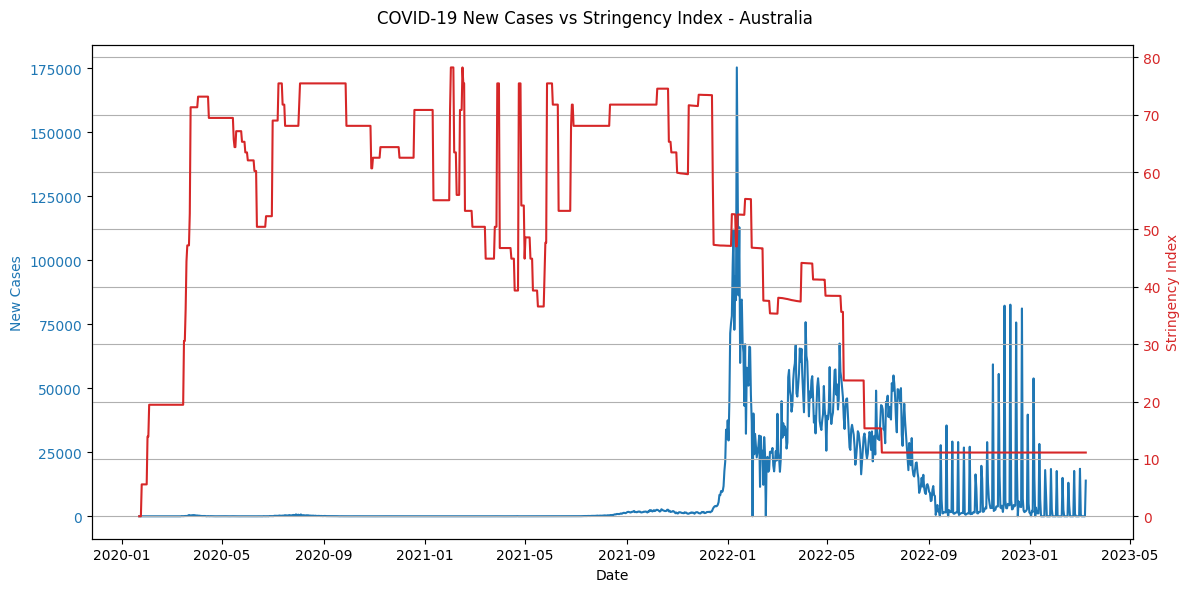

In [25]:
# %%
# Plot example country

import matplotlib.pyplot as plt

country = "Australia"
df_country = merged_df[merged_df["country"] == country]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis: New cases
ax1.plot(df_country["date"], df_country["new_cases"], color="tab:blue", label="Newly Confirmed Cases")
ax1.set_xlabel("Date")
ax1.set_ylabel("New Cases", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Right Y-axis: Stringency Index
ax2 = ax1.twinx()
ax2.plot(df_country["date"], df_country["StringencyIndex_Average"], color="tab:red", label="Stringency Index")
ax2.set_ylabel("Stringency Index", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Title and grid
fig.suptitle(f"COVID-19 New Cases vs Stringency Index - {country}")
fig.tight_layout()
plt.grid(True)
plt.show()

